# Análisis de Regresión

**Actividad:**

- Realizar un análisis de regresión para predecir el precio de las casas usando el conjunto de datos "Boston Housing Data Set".


## Cargar los datos

In [1]:
# Importar las librerías necesarias
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
# leemos los datos del archivo csv

df= pd.read_csv('datos/bostonData.csv',sep=';')

# Se visualizacion las 5 primeras filas.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,632,180,231,0,538,6575,652,409,10,2960,153,498,240
1,2731,0,707,0,469,6421,789,49671,20,2420,178,914,216
2,2729,0,707,0,469,7185,611,49671,20,2420,178,403,347
3,3237,0,218,0,458,6998,458,60622,30,2220,187,294,334
4,6905,0,218,0,458,7147,542,60622,30,2220,187,533,362


Los atributos de los datos en la tabla son los siguientes:

- CRIM - tasa de criminalidad per cápita por ciudad.
- ZN - proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
- INDUS - proporción de acres comerciales no minoristas por ciudad.
- CHAS: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número promedio de cuartos por vivienda
- AGE - proporción de unidades ocupadas por propietarios construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a las carreteras radiales
- TAX: tasa de impuestos sobre la propiedad de valor total por cada 10,000 dolares
- PTRATIO - ratio alumno-profesor por localidad
- LSTAT - % estado más bajo de la población
- target: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


In [3]:
# 1. Imprimir el tamaño del conjunto de datos (shape)
df.shape

(506, 13)

## Visualización y análisis de los datos

In [4]:
# Imprimir la matriz de correlación

# La matriz de correlación muestra la fuerza de la relación lineal entre dos varianles, varía entre -1 y 1
# entre más lejos de cero, más fuerte la relación (directa o inversa )
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
CRIM,1.000000,-0.275084,-0.255484,0.036457,-0.024580,-0.020357,0.425480,-0.349564,0.759367,0.718401,0.334202,0.322543,-0.320111
ZN,-0.275084,1.000000,-0.219946,-0.042697,0.076246,0.101617,-0.569537,0.491386,-0.311948,-0.314563,-0.391679,-0.356298,0.360445
INDUS,-0.255484,-0.219946,1.000000,0.073722,0.039306,-0.064913,0.183645,-0.156631,-0.438973,-0.206302,-0.110691,0.089826,-0.104059
CHAS,0.036457,-0.042697,0.073722,1.000000,0.018540,0.018436,0.086518,-0.110602,-0.007368,-0.035587,-0.121515,-0.040149,0.175260
NOX,-0.024580,0.076246,0.039306,0.018540,1.000000,0.036744,-0.040030,-0.008802,-0.070846,-0.099637,-0.182852,-0.058503,0.170189
RM,-0.020357,0.101617,-0.064913,0.018436,0.036744,1.000000,-0.044445,0.078149,-0.013040,-0.025271,-0.062559,-0.125440,0.187720
AGE,0.425480,-0.569537,0.183645,0.086518,-0.040030,-0.044445,1.000000,-0.639236,0.456022,0.506456,0.261515,0.513484,-0.376955
DIS,-0.349564,0.491386,-0.156631,-0.110602,-0.008802,0.078149,-0.639236,1.000000,-0.374222,-0.405540,-0.134127,-0.381643,0.177004
RAD,0.759367,-0.311948,-0.438973,-0.007368,-0.070846,-0.013040,0.456022,-0.374222,1.000000,0.910228,0.464741,0.455967,-0.381626
TAX,0.718401,-0.314563,-0.206302,-0.035587,-0.099637,-0.025271,0.506456,-0.405540,0.910228,1.000000,0.460853,0.499664,-0.468536


In [5]:
# Seleccionemos solo la relación de las variables con la variable a predecir (target)

df.corr()['target'].abs().sort_values(ascending=False)

target     1.000000
LSTAT      0.635239
PTRATIO    0.507787
TAX        0.468536
RAD        0.381626
AGE        0.376955
ZN         0.360445
CRIM       0.320111
RM         0.187720
DIS        0.177004
CHAS       0.175260
NOX        0.170189
INDUS      0.104059
Name: target, dtype: float64

<AxesSubplot:xlabel='TAX', ylabel='target'>

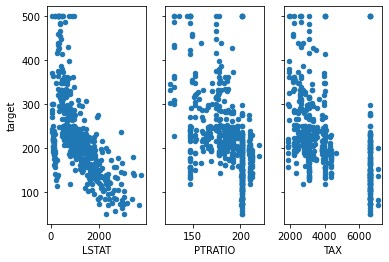

In [30]:
# 2. Graficar algunos de los atributos contra la variable objetivo (target) en diagramas de dispersión
#    Al menos 3, buscar los que tienes mayor correlación según la tabla anterior.

fig, axs=plt.subplots(1,3, sharey=True)
df.plot(kind='scatter', x='LSTAT', y='target', ax=axs[0])
df.plot(kind='scatter', x='PTRATIO', y='target', ax=axs[1])
df.plot(kind='scatter', x='TAX', y='target', ax=axs[2])

## Diseño de los modelos

In [31]:
# 3. Crear una lista especial con cuatro atributos con fuerte correlación con la variable a predecir

df[df.corr()['target'].abs().nlargest(5).index.tolist()[1:]]


,LSTAT,PTRATIO,TAX,LSTAT**grado
0,498,153,2960,61505984016
1,914,178,2420,697886476816
2,403,178,2420,26376683281
3,294,187,2220,7471182096
4,533,187,2220,80706559921
...,...,...,...,...
501,967,210,2730,874391437921
502,908,210,2730,679740887296
503,564,210,2730,101185065216
504,648,210,2730,176319369216


In [32]:
# 4. Crear conjunto entranemiento/prueba con la seleccion de los atributos anteriores del dataframe principal

from sklearn.model_selection import train_test_split

x=df[df.corr()['target'].abs().nlargest(5).index.tolist()[1:]]
y=df["target"]
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, random_state=0,test_size=0.3)

In [33]:
# 5. Crear conjunto entranemiento/prueba con todos los atributos del dataframe principal

from sklearn.model_selection import train_test_split
x=df[df.corr()['target'].abs().nlargest(13).index.tolist()[1:]]
y=df["target"]
x_entrenamientoUno, x_pruebaUno, y_entrenamientoUno, y_pruebaUno = train_test_split(x, y, random_state=0,test_size=0.3)

In [34]:
# 6. Crear un conjunto entrenamiento/prueba con un solo atributo. Seleccione el que considere mejor predictor
x=df[["LSTAT"]]
y=df["target"]
x_entrenamientoDos, x_pruebaDos, y_entrenamientoDos, y_pruebaDos = train_test_split(x, y, random_state=0)



In [35]:
## 7. Crear tres modelos de regresión para cada conjunto entrenamiento/prueba de los puntos 3. 4 y 5 anteriores.

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_entrenamiento, y_entrenamiento)
regUno=LinearRegression().fit(x_entrenamientoUno, y_entrenamientoUno)
regDos=LinearRegression().fit(x_entrenamientoDos, y_entrenamientoDos)



In [36]:
# 8. imprimir intercepto y coeficientes de cada unos de los modelos

print("Intercepto: ",reg.intercept_)
print("Coeficiente: ",reg.coef_)
print("Intercepto: ",regUno.intercept_)
print("Coeficiente: ",regUno.coef_)
print("Intercepto: ",regDos.intercept_)
print("Coeficiente: ",regDos.coef_)


Intercepto:  582.2022292596084
Coeficiente:  [-6.47613021e-02 -1.43579614e+00 -5.19036812e-03  4.76577827e-13]
Intercepto:  555.2692221126523
Coeficiente:  [-6.12580822e-02 -1.15917217e+00 -1.86270071e-02  4.21982451e-13
  3.25905355e-01 -2.51102785e-02  3.81999536e-02 -2.32421989e-05
  4.04297671e-03 -6.59224969e-04  3.95482572e+00  1.40535264e-02]
Intercepto:  314.17242077780145
Coeficiente:  [-0.0770238]


## Evaluación de los modelos

In [37]:
#  9. Para evaluar los modelos creados, calcular el coeficiente de determinación (score), 
#     las sumas residuales, el error cuadrático medio y la raiz del error cuadrático medio.

# Utiliza la función que calcula las diferencias residuales.
def obtener_RSS(modelo, datos, salida):
    # Primero obtener las predicciones
    predicciones = modelo.predict(datos)
    # Calcular los residuales 
    residuales = salida - predicciones
    # Elevarlos al cuadrado y sumarlos
    RSS = (residuales * residuales).sum()
    return(RSS) 


In [38]:
# Evaluacion modelo 1 
print("coeficiente de determinacion:",reg.score(x_prueba,y_prueba))
RSS = obtener_RSS(reg, x_prueba, y_prueba)
print(RSS)
MSE = RSS/(len(y_prueba))
print(MSE)
RMSE =sqrt(MSE)
print(RMSE)

coeficiente de determinacion: 0.43691311484285855
712662.8218251619
4688.57119621817
68.47314215236635


In [39]:
# Evaluacion modelo 2
print("coeficiente de determinacion:",regUno.score(x_pruebaUno,y_pruebaUno))
RSS = obtener_RSS(regUno, x_pruebaUno, y_pruebaUno)
print(RSS)
MSE = RSS/(len(y_pruebaUno))
print(MSE)
RMSE =sqrt(MSE)
print(RMSE)

coeficiente de determinacion: 0.5083562923915559
622241.7911563304
4093.695994449542
63.98199742466268


In [40]:
# Evaluacion modelo 3
print("coeficiente de determinacion:",regDos.score(x_pruebaDos,y_pruebaDos))
RSS = obtener_RSS(regDos, x_pruebaDos, y_pruebaDos)
print(RSS)
MSE = RSS/(len(y_pruebaDos))
print(MSE)
RMSE =sqrt(MSE)
print(RMSE)

coeficiente de determinacion: 0.3328207965940464
692250.1272952511
5450.788403899615
73.82945485305723


### Refinamiento del modelo


#### Con el atributo seleccionado en el punto 6, realizar regresion polinomial con grados = 2,4,8 y 16. 
#### Entrenar y evaluar los modelos para cada uno de los grados del polinomio

In [42]:
def polinomial_dataframe(atributo, grado):
    # asumir que grado es >= 1
    # inicializar el DataFrame:
    poli_dataframe = pd.DataFrame()
    # fijar poli_dataframe['potencia_1'] igual al atributo pasado
    poli_dataframe['potencia_1'] = atributo
    # chequear si grado > 1
    if grado > 1:
        # realizar un lazo con los grados restantes:
        for potencia in range(2, grado+1): 
            # primero le damos el nombre a la columna:
            nombre = 'potencia_' + str(potencia)
            # luego asignamos a poli_dataframe[nombre] la potencia del atributo apropiada
            poli_dataframe[nombre] = atributo**potencia
    return poli_dataframe

In [43]:
def regresion_polinomial(data, data1,grado):
    poli_data_X = polinomial_dataframe(data, grado)
    modelo = LinearRegression()
    modelo.fit(poli_data_X, data1)
    return modelo

regP=regresion_polinomial(x_entrenamientoDos, y_entrenamientoDos,2)
print("Intercepto: ",regP.intercept_)
poli_prueba_X = polinomial_dataframe(x_pruebaDos, 2)
RSS = obtener_RSS(regP, poli_prueba_X, y_pruebaDos)
print("RSS: ",RSS)
MSE = RSS/(len(y_pruebaDos))
print("MSE:",MSE)
RMSE =sqrt(MSE)
print("RMSE:",RMSE)
print("coeficiente de determinacion:",regP.score(poli_prueba_X,y_pruebaDos))
print("Coeficiente: ",regP.coef_)

Intercepto:  326.2120465591495
RSS:  684976.6684157321
MSE: 5393.517074139623
RMSE: 73.44056831302181
coeficiente de determinacion: 0.33983083575460804
Coeficiente:  [-1.02423144e-01  8.85709023e-06]


In [44]:
regP4=regresion_polinomial(x_entrenamientoDos, y_entrenamientoDos,4)
print("Intercepto: ",regP4.intercept_)
poli_prueba_X = polinomial_dataframe(x_pruebaDos, 4)
RSS = obtener_RSS(regP4, poli_prueba_X, y_pruebaDos)
print("RSS: ",RSS)
MSE = RSS/(len(y_pruebaDos))
print("MSE:",MSE)
RMSE =sqrt(MSE)
print("RMSE:",RMSE)
print("coeficiente de determinacion:",regP4.score(poli_prueba_X,y_pruebaDos))
print("Coeficiente: ",regP4.coef_)
print("\n")
print("Con grado 6: ")
regP6=regresion_polinomial(x_entrenamientoDos, y_entrenamientoDos,6)
print("Intercepto: ",regP6.intercept_)
poli_prueba_X = polinomial_dataframe(x_pruebaDos, 6)
RSS = obtener_RSS(regP6, poli_prueba_X, y_pruebaDos)
print("RSS: ",RSS)
MSE = RSS/(len(y_pruebaDos))
print("MSE:",MSE)
RMSE =sqrt(MSE)
print("RMSE:",RMSE)
print("coeficiente de determinacion:",regP6.score(poli_prueba_X,y_pruebaDos))
print("Coeficiente: ",regP6.coef_)
print("\n")
print("Con grado 8: ")
regP8=regresion_polinomial(x_entrenamientoDos, y_entrenamientoDos,8)
print("Intercepto: ",regP8.intercept_)
poli_prueba_X = polinomial_dataframe(x_pruebaDos, 8)
RSS = obtener_RSS(regP8, poli_prueba_X, y_pruebaDos)
print("RSS: ",RSS)
MSE = RSS/(len(y_pruebaDos))
print("MSE:",MSE)
RMSE =sqrt(MSE)
print("RMSE:",RMSE)
print("coeficiente de determinacion:",regP8.score(poli_prueba_X,y_pruebaDos))
print("Coeficiente: ",regP8.coef_)
print("\n")
print("Con grado 16: ")
regP16=regresion_polinomial(x_entrenamientoDos, y_entrenamientoDos,16)
print("Intercepto: ",regP16.intercept_)
poli_prueba_X = polinomial_dataframe(x_pruebaDos, 16)
RSS = obtener_RSS(regP16, poli_prueba_X, y_pruebaDos)
print("RSS: ",RSS)
MSE = RSS/(len(y_pruebaDos))
print("MSE:",MSE)
RMSE =sqrt(MSE)
print("RMSE:",RMSE)
print("coeficiente de determinacion:",regP16.score(poli_prueba_X,y_pruebaDos))
print("Coeficiente: ",regP16.coef_)


Intercepto:  252.19296193354901
RSS:  659398.3974154082
MSE: 5192.113365475655
RMSE: 72.05632078780914
coeficiente de determinacion: 0.36448274956092963
Coeficiente:  [ 2.62935895e-01 -4.19404850e-04  1.74440678e-07 -2.27261077e-11]


Con grado 6: 
Intercepto:  298.66151426203237
RSS:  677297.8556072466
MSE: 5333.053981159423
RMSE: 73.02776171538754
coeficiente de determinacion: 0.34723154831595604
Coeficiente:  [-4.31837609e-08 -2.37530201e-05 -6.34077962e-08  3.88033434e-11
 -5.70485749e-15 -1.60696219e-19]


Con grado 8: 
Intercepto:  298.3764788388769
RSS:  677973.0397978954
MSE: 5338.370392109412
RMSE: 73.06415257915069
coeficiente de determinacion: 0.3465808169795396
Coeficiente:  [-4.43716016e-08 -2.43766586e-05 -6.21297588e-08  3.81926201e-11
 -5.61900482e-15 -1.49402053e-19  4.91066849e-19  6.82427073e-20]


Con grado 16: 
Intercepto:  296.11599463510356
RSS:  690882.7100699067
MSE: 5440.021339133124
RMSE: 73.75650031782368
coeficiente de determinacion: 0.33413869066030466
Coe

In [45]:
# Inlcuir en la lista de mejores atributos (modelo punto 3) la potencia que obtuvo mejores resultados 
#     en el punto anterior, reformular el modelo y evaluar.

df['LSTAT**grado'] = df['LSTAT'].apply(lambda x: x**4)
lista=df.corr()['target'].abs().nlargest(5).index.tolist()[1:]
atributos_cols = ['LSTAT**grado', 'LSTAT','PTRATIO', 'TAX', 'RAD']
x=df[atributos_cols]
y=df.target
x_entrenamientoCuatro, x_pruebaCuatro, y_entrenamientoCuatro, y_pruebaCuatro = train_test_split(
    x, y, random_state=0)

RegPot=LinearRegression().fit(x_entrenamientoCuatro, y_entrenamientoCuatro)
print("Intercepto: ",RegPot.intercept_)
RSS = obtener_RSS(RegPot,x_pruebaCuatro, y_pruebaCuatro)
print("RSS: ",RSS)
MSE = RSS/(len(y_pruebaCuatro))
print("MSE:",MSE)
RMSE =sqrt(MSE)
print("RMSE:",RMSE)
print("coeficiente de determinacion:",RegPot.score(x_pruebaCuatro,y_pruebaCuatro))
print("Coeficiente: ",RegPot.coef_)

Intercepto:  612.9969005061321
RSS:  623585.678694194
MSE: 4910.123454284992
RMSE: 70.07227307776587
coeficiente de determinacion: 0.3989984545151165
Coeficiente:  [ 4.65706163e-13 -6.60113280e-02 -1.43641833e+00 -1.95054287e-02
  3.02833293e-01]


### Conclusiones

In [ ]:
#El modelo de regresión polinomial de grado 4 obtuvo el mejor score.
#Los atributos PTRATIO, LSTAT, TAX y RAD tienen correlaciones significativas con el valor 
#medio de las viviendas, con RAD siendo el más influyente. 
#En base a los datos analizados, el modelo de regresión polinomial obtuvo mejores resultados 
#que el modelo de regresión lineal en el problema de predicción del valor medio de las viviendas ocupadas. 
#se puede concluir que el uso de un modelo de regresión polinomial es más adecuado para 
#este problema que un modelo de regresión lineal.